Exercise 1: The basics of image processing
=======================

To complete the exercise, follow the instructions and complete the missing code and write the answers where required.  All points, except the ones marked with **(N points)** are mandatory. The optional tasks require more independent work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

If you have not used Python, IPython and Jupyter environment before, take a look at the following list introductory tutorials:

 * [Introduction to Python 3](https://realpython.com/python-introduction/)
 * [Useful IPython facts](https://ipython.org/ipython-doc/3/interactive/tutorial.html)
 * [Introduction to Jupyter notebooks](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
 * [Introduction to NumPy, SciKit, MatPlotLib](https://cs231n.github.io/python-numpy-tutorial/)


In [1]:
# First, run this cell to download the data used in this exercise
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("http://data.vicos.si/lukacu/multimedia/Exercise1.zip").read())).extractall()

Assignment 1: Basic image processing
----------

The aim of this assignment is to familiarize yourself with the basic functionality of SciKit, NumPy and MatPlotLib, as well as the use of matrices for storing image information. In this assignment, you will try to load an image, display it and manipulate its content with NumPy operations.

 * Read image from the file `umbrellas.jpg`, and display it using functions skimage.io.imshow. The image that you have loaded consists of three channels (Red, Green, and Blue), and is represented as a 3-D matrix with dimensions height × width × channels.

<IPython.core.display.Javascript object>


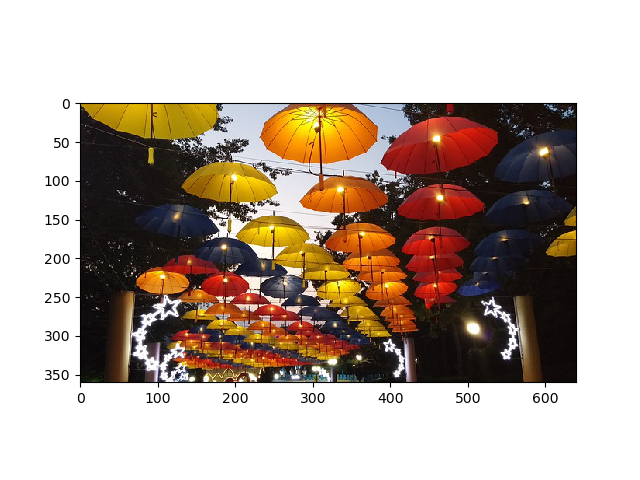

In [2]:
# Use this IPython command to enable interactive plots (without it they will be rendered only as static images)
%matplotlib notebook

# We will be using SciKit-Image library for image IO and image processing and MatPlotLib 
# for visualization in the notebook.
from skimage import data, io
from matplotlib import pyplot as plt

image = io.imread("umbrellas.jpg")
plt.imshow(image) # Draw the image
plt.show() # Display the image

 * You can query the dimensions of the matrix using the property `shape`. Observe that a color image has three layers (third dimension), while a grayscale image has only one layer and is also missing the third dimension. Also check the dtype of the matrix, by default images are presented using uint8 type (unsigned integers in range 0 to 255).

In [3]:
print(image.shape)

gray = io.imread("phone.jpg")
print(gray.shape)

print(image.dtype)

(360, 640, 3)
(384, 510)
uint8


 * Convert the color image into a grayscale one by averaging all three channels. Be careful when visualizing single channel images as they are not always visualized as grayscale. It is important to correctly set the colormap of the plot.

float64


<IPython.core.display.Javascript object>


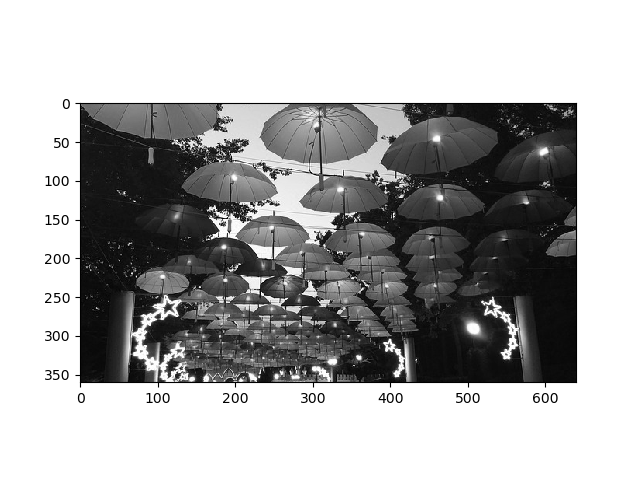

<IPython.core.display.Javascript object>


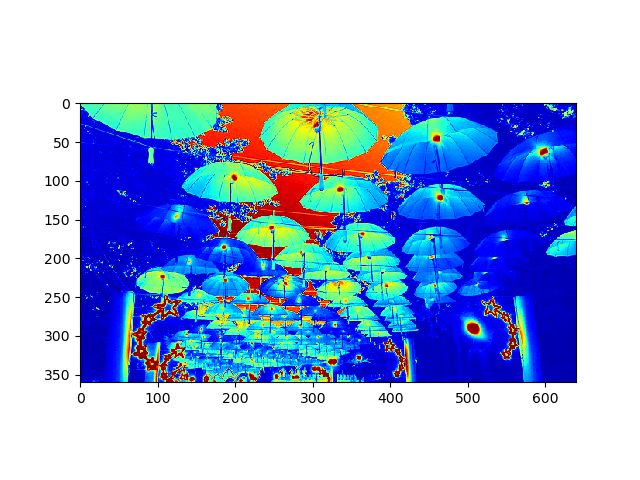

In [4]:
# We will be using numpy library for low-level matrix operations.
import numpy as np

gray = np.mean(image, 2) # Function numpy.mean converts image to float64
print(gray.dtype) # Display the data type of matrix

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.gray) # If we want to display image correctly we have to cast it to uint8 again.
plt.show()

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.jet) # Change colormap to interpret values differently.
plt.show()

 * Cut out a rectangular sub-image, and display it as a new image. Mark the same region in the original image by setting its third (the blue) color channel to 0, and display the modified image.

<IPython.core.display.Javascript object>


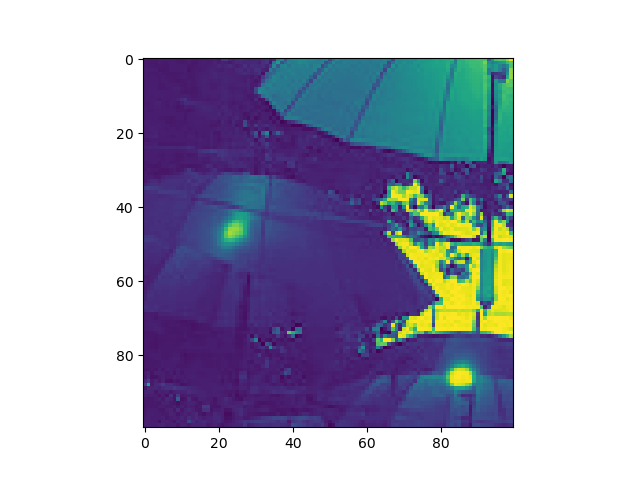

<IPython.core.display.Javascript object>


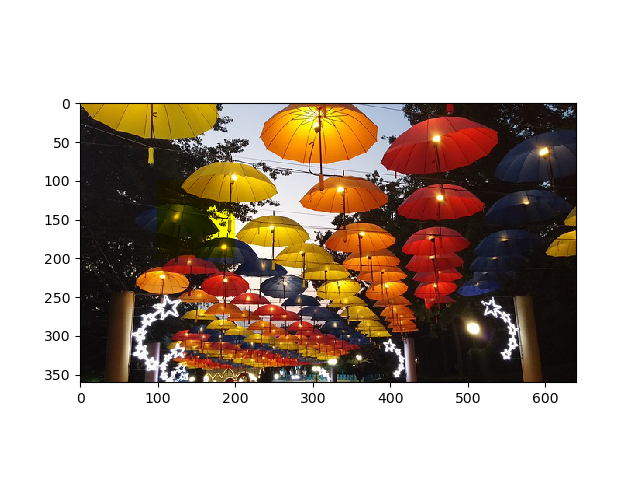

In [5]:
cutout = image[100:200, 100:200, 1]
plt.figure()
plt.imshow(cutout)
plt.show()

# TODO: set a part of the image to 0 using range-indexing notation.
image[100:200, 100:200, 2] = 0
plt.figure()
plt.imshow(image)
plt.show()

 * Display a grayscale image that has the selected region negated (its values are inverted).

<IPython.core.display.Javascript object>


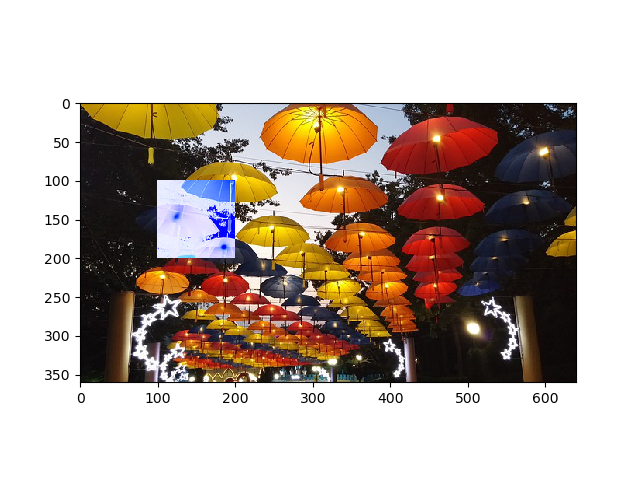

In [6]:
# TODO: use the same region as before. You can use matrix-scalar operations to achieve negation (255 - A).
image[100:200, 100:200] = 255 - image[100:200, 100:200]
plt.figure()
plt.imshow(image)
plt.show()

 * Compute and display a thresholded binary image. Thresholding is an image operation that produces a binary image (mask) of the same size as the source image; its values are 1 (true) and 0 (false), depending on whether the corresponding pixels in the source image have values greater or lower than the specified threshold. Use a threshold of 150, and display the resulting image. Experiment with different thresholds and write down your observations.

<IPython.core.display.Javascript object>


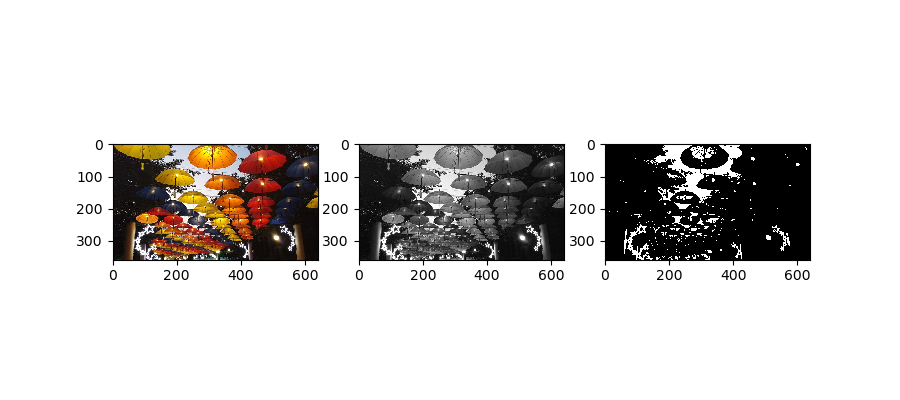

In [7]:
import numpy as np

image = io.imread("umbrellas.jpg")

gray = np.mean(image, 2)

_, ax = plt.subplots(1, 3, figsize=(9, 4)) # Divide plot into a grid of axes, use each handle to draw on subplot

ax[0].imshow(image)
ax[1].imshow(gray, cmap=plt.cm.gray)

thresholded = gray > 150
ax[2].imshow(thresholded, cmap=plt.cm.gray)
plt.show()


Assignment 2: Histograms
----
    
In this assignment, we will take a look at the construction of histograms. Histograms are a very useful tool in image analysis; as we will be using them extensively in the later exercises, it is recommended that you pay extra attention to how they are built. In this assignment, we will focus on the construction of histograms for single-channel (grayscale)
images. We will use function `skimage.exposure.histogram` which has some useful modes. Check the documentation for arguments `nbins`, `source_range` and `normalize` and write down their function. What is the meaning of variables returned by the function?

In [8]:
from skimage.exposure import histogram

image = np.mean(io.imread("umbrellas.jpg"), 2).astype(np.uint8)
hvalues, hbins = histogram(image, nbins=256, source_range='dtype', normalize=False)

print(hvalues)
print(hbins)

[  15   70   84  104  111  137  189  294  465 1202 2708 4037 5511 5656
 5162 4824 4833 4899 4792 5062 5234 4921 4393 3776 3197 2800 2424 2189
 2006 1891 1841 1696 1673 1648 1554 1591 1635 1467 1416 1374 1271 1178
 1229 1115 1060 1050 1025 1009 1008 1010 1048  978  998 1080 1081 1143
 1154 1218 1201 1305 1246 1265 1201 1144 1169 1178 1209 1236 1187 1140
 1118 1069 1117 1079 1036 1090 1017  998 1046 1098 1007 1016 1020  981
  960  955  957  963  963  914  924  835  874  908  835  863  875  853
  868  880  914  930  966  961  994 1088 1110 1055 1166 1168 1171 1082
 1064 1070 1023  984  995  909  946  893  854  793  812  791  777  805
  762  757  748  729  706  692  675  640  666  594  541  536  514  466
  492  495  417  417  381  382  377  357  337  292  289  283  307  272
  272  260  255  242  258  230  251  226  227  207  206  220  193  171
  174  172  155  156  151  138  172  136  142  134  140  164  110  138
  124  122  115  153  138  152  133  169  191  234  230  249  294  315
  464 

 * Compute histogram for more than one image of your choice and visualize the results using `matplotlib.pyplot.bar`.

<IPython.core.display.Javascript object>


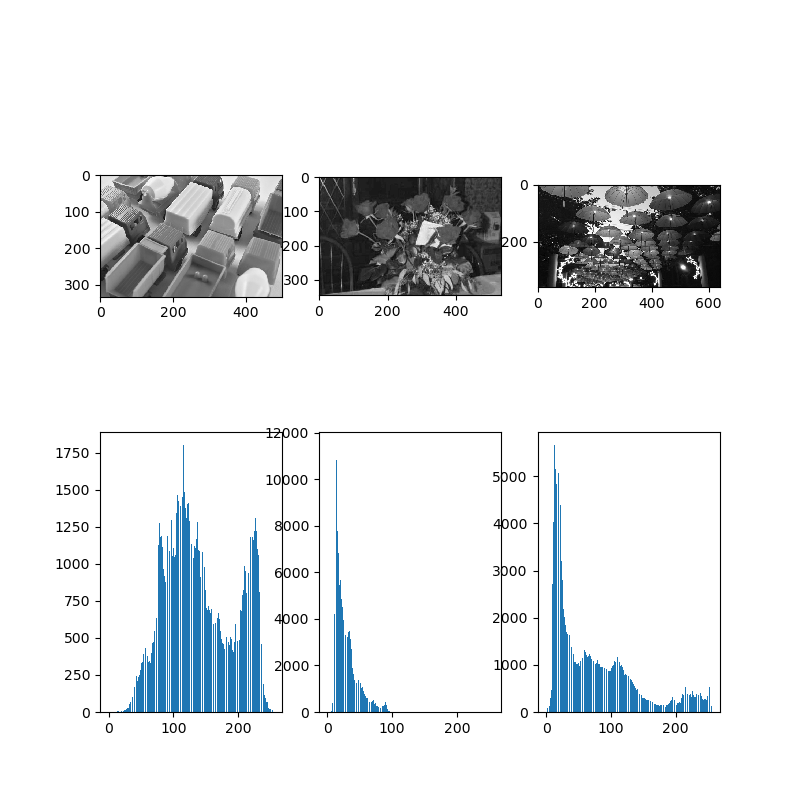

In [9]:

_, ax = plt.subplots(2, 3, figsize=(8, 8))

ax[0][2].imshow(image, cmap = plt.cm.gray)
ax[1][2].bar(hbins, hvalues) # Use this function to draw a bar graph
plt.show()

# TODO: add at least two more images and their histograms to the left of the figure.
image2 = np.mean(io.imread("trucks.jpg"), 2).astype(np.uint8)
hvalues2, hbins2 = histogram(image2, nbins = 256, source_range = 'dtype', normalize = False)
ax[0][0].imshow(image2, cmap = plt.cm.gray)
ax[1][0].bar(hbins2, hvalues2)

image3 = np.mean(io.imread("flowers.jpg"), 2).astype(np.uint8)
hvalues3, hbins3 = histogram(image3, nbins = 256, source_range = 'dtype', normalize = False)
ax[0][1].imshow(image3, cmap = plt.cm.gray)
ax[1][1].bar(hbins3, hvalues3)
plt.show()

 * For this task, you will implement a simple image operation called `histogram stretching`. Using the pseudo-code provided below, implement the function `histstretch`, which performs the histogram stretching on the input grayscale image. For the outline of the algorithm, consult the slides from the lectures. As we are performing the same operation (with the same factors) on all image elements, the operation can be sped-up via use of matrix operations, which perform the operation on the whole image at once. Do not use any existing function to simplify your work, this assignment should test your skills a bit.
 
   Hints: The maximum and the minimum grayscale value in the input image, can be determined using functions `np.max` and `np.min`.
   
   Test the function by writing a script that reads an image from file `phone.jpg` (note that it is already a grayscale image), compute the histogram with 256 bins, and displays it. As you can observe from the histogram, the lowest grayscale value in the image is not 0, and the highest value is not 255. Perform the histogram stretching operation and visualize the results (display the image and plot its 256-bin histogram).

<IPython.core.display.Javascript object>


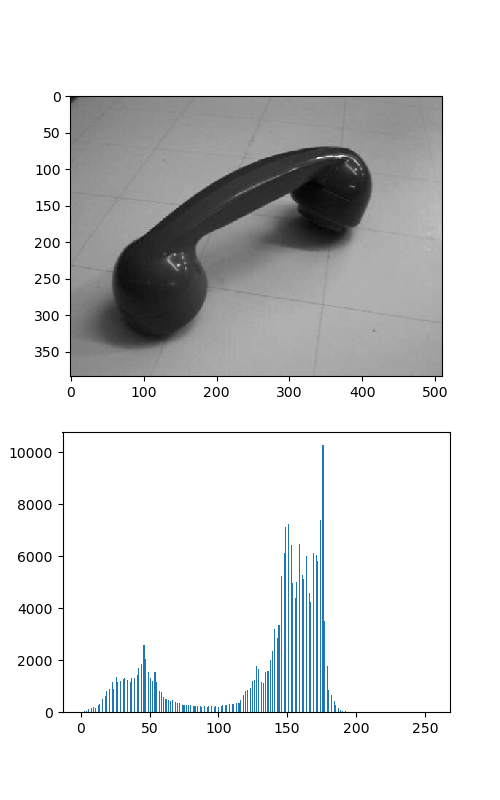

In [10]:
def histstretch(image):
    # TODO:
    # 1. determine the minimum and maximum value of I
    # 2. the minimum and maximum of the output image S are known
    # 3. use the stretch formula to compute new value for each pixel
    inMax = np.max(image)
    inMin = np.min(image)
    outMax = 255
    outMin = 0
    image = outMin + (image - inMin) * ((outMax - outMin) / (inMax - inMin))
    hvalues, hbins = histogram(image.astype(np.uint8), nbins = 256, source_range = 'dtype', normalize = False)
    
    _, ax = plt.subplots(2, 1, figsize=(5, 8))
    ax[0].imshow(image.astype(np.uint8), cmap = plt.cm.gray)
    ax[1].bar(hbins, hvalues)
    plt.show()
    pass
    
# TODO: write a code to test your function
histstretch(io.imread("phone.jpg"))

Assignment 3: Color spaces
------
    
The color information can be encoded using different color spaces, with each color space having its own characteristics. This assignment will demonstrate how a relatively simple conversion between the RGB and the HSV color spaces helps us achieve interesting results.

 * Read image from the file `trucks.jpg`. Display the image on screen, both as a color image in the RGB color space, and each of its channels as a separate grayscale image.

<IPython.core.display.Javascript object>


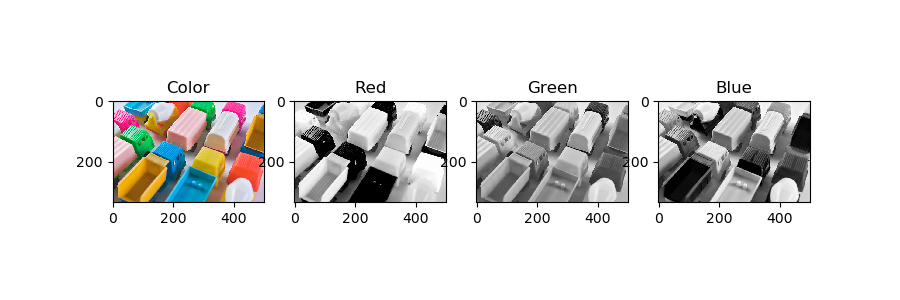

In [11]:
image = io.imread("trucks.jpg")
_, ax = plt.subplots(1, 4, figsize=(9, 3))

ax[0].imshow(image)
ax[0].set_title("Color")
ax[1].imshow(image[:, :, 0], cmap = plt.cm.gray)
ax[1].set_title("Red")
ax[2].imshow(image[:, :, 1], cmap = plt.cm.gray)
ax[2].set_title("Green")
ax[3].imshow(image[:, :, 2], cmap = plt.cm.gray)
ax[3].set_title("Blue")

plt.show()

 * Convert the image from the RGB color space to the HSV color space, using the built-in function `skimage.color.rgb2hsv`, and display each channel as a separate grayscale image. When working with resulting matrices, take a note of their type; the original image in the RGB color space is stored in a matrix of type `uint8`, while the converted image is stored in a matrix of type `float64` (real values in range 0 to 1). How do you interpret the channels of the HSV color space with respect to the original RGB channels?

<IPython.core.display.Javascript object>


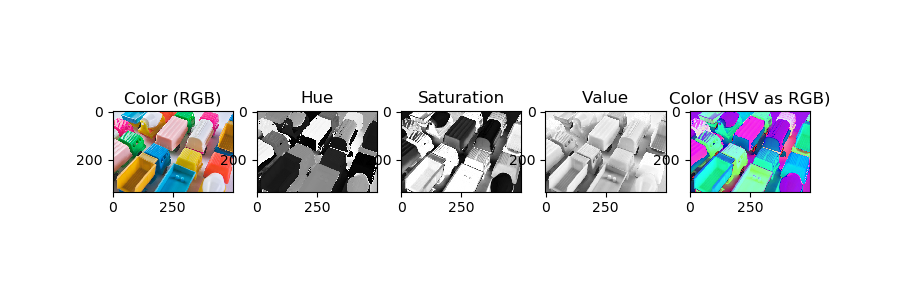

uint8


In [12]:
from skimage.color import rgb2hsv

rgbimage = io.imread("trucks.jpg")

hsvimage = rgb2hsv(rgbimage)

_, ax = plt.subplots(1, 5, figsize=(9, 3))

print(image.dtype)

ax[0].imshow(rgbimage)
ax[0].set_title("Color (RGB)")
ax[1].imshow(hsvimage[:, :, 0], cmap = plt.cm.gray)
ax[1].set_title("Hue")
ax[2].imshow(hsvimage[:, :, 1], cmap = plt.cm.gray)
ax[2].set_title("Saturation")
ax[3].imshow(hsvimage[:, :, 2], cmap = plt.cm.gray)
ax[3].set_title("Value")
ax[4].imshow(hsvimage) # Do not do this, image will be interpreded as RGB, result will be strange.
ax[4].set_title("Color (HSV as RGB)")
plt.show()

 * Different color spaces are also useful when we wish to threshold the image. For example, in the RGB color space, it is difficult to determine regions that belong to a certain shade of a color. To demonstrate this, load the image from file `trucks.jpg`, and threshold its blue channel with the threshold value of 200. Display the original and the thresholded image next to each other.

<IPython.core.display.Javascript object>


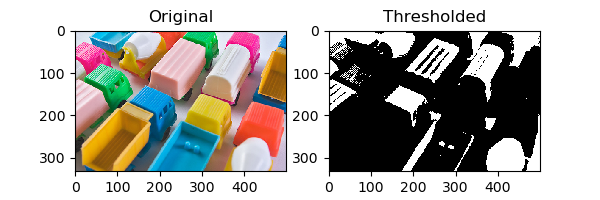

In [13]:
# TODO
image = io.imread("trucks.jpg")
thresholded = image[:, :, 2] > 200

_, ax = plt.subplots(1, 2, figsize = (6, 2))
ax[0].imshow(image)
ax[0].set_title("Original")
ax[1].imshow(thresholded, cmap = plt.cm.gray)
ax[1].set_title("Thresholded")
plt.show()

 * If we want to extract a custom color shade, it is much more intuitive to convert the image to the HSV color space. Modify your script so that the image is converted from the RGB to the HSV color space, and perform thresholding on the Hue channel. As the blue color occupies only a limited portion of the hue value range, we need to apply two thresholds - an upper and a lower one. For numpy matrices this can be done by applying a logical function of two masks (obtained with two different thresholds), e.g., `AB = np.logical_and(A, B)`.

   Experiment with different threshold values to find the optimal ones, and display the resulting thresholded image. To display the masked color in an easily interpretable way, you can use the function \fun{isolate\_color} that is included in the exercise material.

<IPython.core.display.Javascript object>


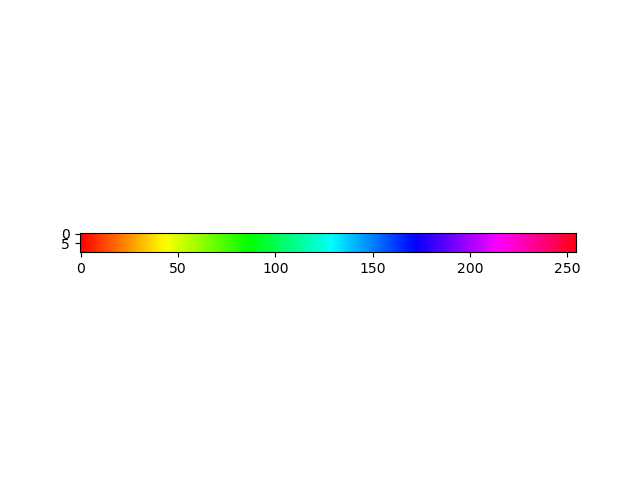

<IPython.core.display.Javascript object>


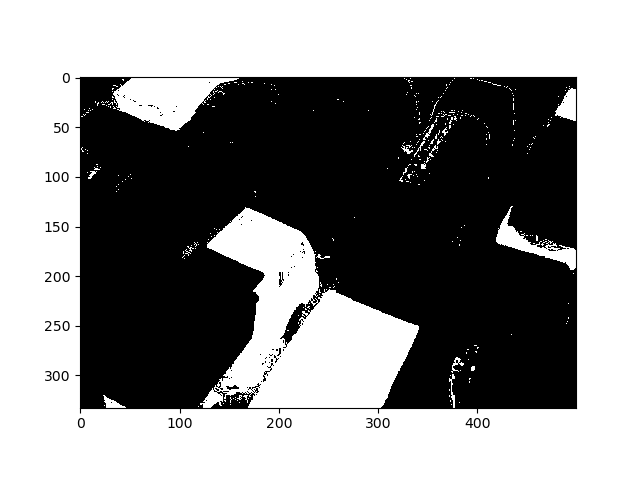

In [14]:
# To determine the threshold values for the blue color, you can use the following code snippet,
# that will display the color spectrum corresponding to the whole hue component.

plt.figure()
plt.imshow(np.meshgrid(np.linspace(0, 1, 255), np.ones((10, 1)))[0], cmap=plt.cm.hsv)
plt.show()

# TODO
hsvimage = rgb2hsv(io.imread("trucks.jpg"))
hsv_threshold_low = hsvimage[:, :, 0] > 0.50
hsv_threshold_high = hsvimage[:, :, 0] < 0.58
hsv_thresholded = np.logical_and(hsv_threshold_low, hsv_threshold_high)
plt.figure()
plt.imshow(hsv_thresholded, cmap = plt.cm.gray)
plt.show()

* **(5 points)** How would you make the thresholding in the HSV color space more robust? Hint: Why is it difficult to determine the hue for some regions? Could you use an additional information to extract such regions? Verify your solution by implementing it.


<IPython.core.display.Javascript object>


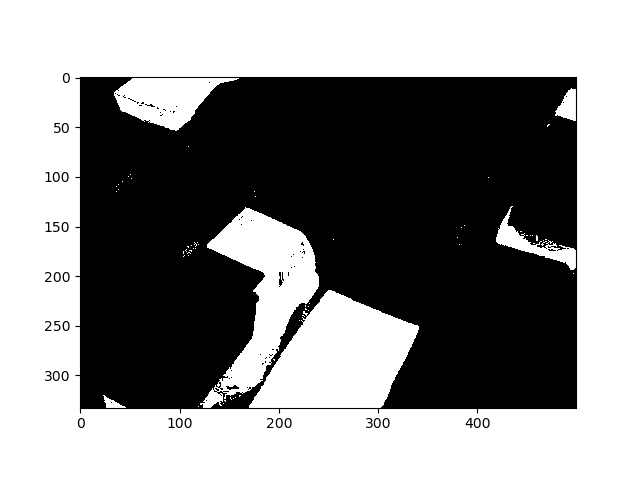

In [15]:
# TODO
hsvimage = rgb2hsv(io.imread("trucks.jpg"))
hsv_threshold_low = hsvimage[:, :, 0] > 0.50
hsv_threshold_high = hsvimage[:, :, 0] < 0.58
hsv_threshold_mask = np.logical_and(hsv_threshold_low, hsv_threshold_high)

hsv_s_threshold = hsvimage[:, :, 1] > 0.2

hsv_threshold_mask = np.logical_and(hsv_threshold_mask, hsv_s_threshold)
plt.figure()
plt.imshow(hsv_threshold_mask, cmap = plt.cm.gray)
plt.show()

 * **(5 points)** How would you use the HSV color space to perform the histogram stretching operation to improve the contrast, but without distorting the colors? Find a color image with weak contrast and write a script that demonstrates your solution on it. Use `skimage.exposure.equalize_hist` to improve image, but note that the function only works correctly on grayscale images, so an extra step is required to achieve correct adjustment.

<IPython.core.display.Javascript object>


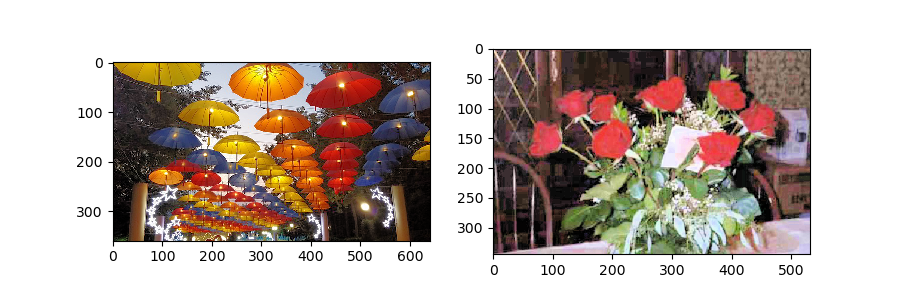

In [16]:
# TODO

from skimage.exposure import equalize_hist
from skimage.color import hsv2rgb

_, ax = plt.subplots(1, 2, figsize=(9, 3))

rgbimage = io.imread("umbrellas.jpg")

hsvimage = rgb2hsv(rgbimage)
hsvimage[:, :, 2] = hsvimage[:, :, 2] / 0.1
hsvimage[:, :, 2] = equalize_hist(hsvimage[:, :, 2])
rgbimage = hsv2rgb(hsvimage)
#eimg = equalize_hist(rgbimage)
ax[0].imshow(rgbimage)

rgbimage = io.imread("flowers.jpg")
hsvimage = rgb2hsv(rgbimage)
hsvimage[:, :, 2] = equalize_hist(hsvimage[:, :, 2])
rgbimage = hsv2rgb(hsvimage)
ax[1].imshow(rgbimage)
plt.show()

Assignment 4: Homography
-----
    
A homography is a bijective transformation between two projection spaces, in our case planes; the first plane is the source image plane, while the second plane is defined by input points that denote an area in which we wish to embed the source image. A homography  s described by a matrix; in case of transformation between two planes, it has dimension
3 × 3.

 * Write a script in which you read and display the image from file `monitor.jpg`, and determine a polygon of four points. It is recommended that you pick the four points that correspond to the corners of the monitor in the image. Determine a suitable order of points (for example, begin at top-right corner and continue in counter-clockwise direction). Afterwards, display a polygon that is defined by the selected points (e.g. set the pixels within the polygon to white as shown in the example below). 

<IPython.core.display.Javascript object>


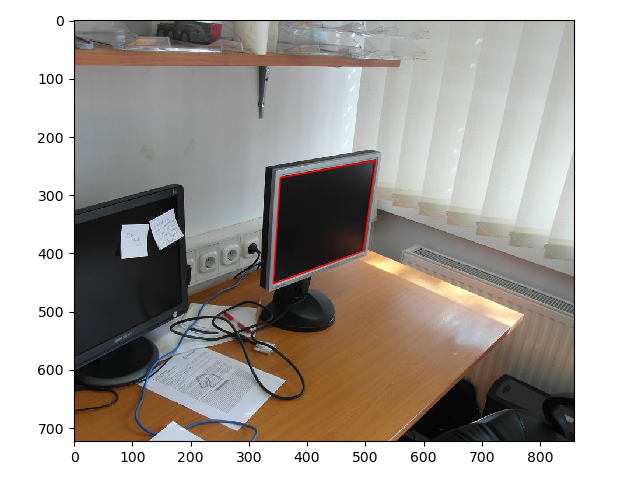

In [17]:
image = io.imread("monitor.jpg")

p2 = [(518, 240), (354, 270), (342, 452), (496, 396)] #TODO: change destination point coordinates here
fig = plt.figure()
io.imshow(image)
xs, ys = zip(*p2) # Convert points to vertices of x and y coordinates (handy function in Python)
plt.fill(xs, ys, edgecolor='r', fill=False)
plt.show()

def onclick(event):
    value = str(event)  # Dynamically update the text box above
    print(value)

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

 * Create a script that reads an image and uses the its dimensions and the selected points to compute the homography, using the function estimate_homography. This function returns the homography matrix H, which can be used to transform pixel-coordinates from the source image plane using the following formula:
\begin{equation}
\label{eq:homography1}
p^\prime_b = \mathbf{H}_{ab}p_a \,
\end{equation}
with the following individual parts of the equation:
\begin{equation}
\label{eq:homography2}
p_a = \begin{bmatrix} x_a\\y_a\\1\end{bmatrix}, p^\prime_b = \begin{bmatrix} w^{\prime}x_b\\w^{\prime}y_{b}\\w^{\prime}\end{bmatrix}, \mathbf{H}_{ab} = \begin{bmatrix} h_{11}&h_{12}&h_{13}\\h_{21}&h_{22}&h_{23}\\h_{31}&h_{32}&h_{33} \end{bmatrix}.
\end{equation}

In [18]:
def estimate_homography(p1, p2):
    A = np.zeros((8,9))
    # Homography matrix
    for i in range(4): # Using the corners
            A[i*2,:] = [ p1[i][0], p1[i][1], 1, 0, 0, 0, -p2[i][0]*p1[i][0], -p2[i][0]*p1[i][1], -p2[i][0] ]
            A[i*2+1,:] = [0, 0, 0, p1[i][0], p1[i][1], 1, -p2[i][1]*p1[i][0], -p2[i][1]*p1[i][1], -p2[i][1] ]

    [U,S,V] = np.linalg.svd(A)
    return np.reshape(V[-1,:],(3,3))

p1 = [(0, 0), (100, 0), (100, 100), (0, 100)] # Some dummy source points

H = estimate_homography(p1, p2)

print(H)

[[ 3.90713073e-03 -2.91745883e-04 -9.07329952e-01]
 [ 2.63547110e-04 -3.27308607e-03 -4.20384534e-01]
 [ 2.92232510e-06 -1.36511769e-06 -1.75160222e-03]]


 * As can be seen from equations above, the resulting point $p^\prime_b$ is in homogenous form, i.e. before we can use its coordinates, they need to be divided by $w^{\prime}$. Homography equation allows you to transform the coordinates of each pixel from the original image to its destination coordinates in the target image. Replace the pixels in the target image with the corresponding pixels from your source image.


[(518, 240), (354, 270), (342, 452), (496, 396)]


<IPython.core.display.Javascript object>


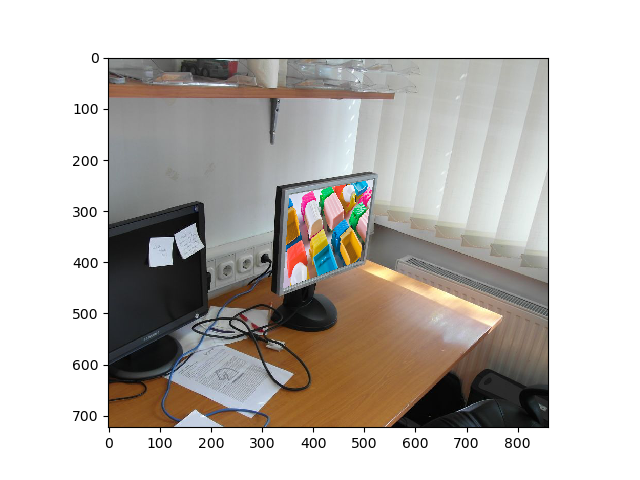

In [19]:
destination = io.imread("monitor.jpg")
source = io.imread("trucks.jpg")

p1 = [(0, 0), (source.shape[1], 0), (source.shape[1], source.shape[0]), (0, source.shape[0])]
print(p2)
H = estimate_homography(p1, p2)

# * Iterate over the source image and map every source pixel to destination one:
#   * Generate its homogeneous coordinate and project it using matrix H
#   * Obtain coordinates in the destination image by normalizing x an y with w and rounding
#   * Copy values from source to destination (be careful about the out-of-image coordinates)
# * Display the resulting image
# TODO
for i in range(source.shape[1]):
    for j in range(source.shape[0]):
        source_coordinates = np.array([i, j, 1])
        new_coordinates = np.matmul(H, source_coordinates)
        new_coordinates = (new_coordinates / new_coordinates[2]).astype(int)
        destination[new_coordinates[1], new_coordinates[0], :] = source[j, i, :]

plt.figure()
plt.imshow(destination)
plt.show()

 * **(10 points)** What is the problem with the pixel mapping approach that we have used in the previous task? Write a better pixel mapping that you have discussed at the lectures that will not have the same problems.

<IPython.core.display.Javascript object>


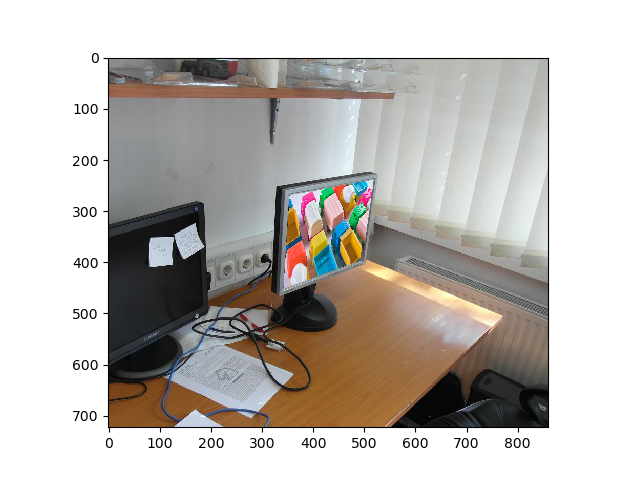

In [20]:
# TODO
destination = io.imread("monitor.jpg")
source = io.imread("trucks.jpg")
H_inv = np.linalg.inv(H)

for i in range(342, 519):
    for j in range(240, 452):
        destination_coordinates = [i, j, 1]
        source_coordinates = np.matmul(H_inv, destination_coordinates)
        source_coordinates = (source_coordinates / source_coordinates[2]).astype(np.int)
        if source_coordinates[0] >= source.shape[1] or source_coordinates[1] >= source.shape[0]:
            continue
        if source_coordinates[0] < 0 or source_coordinates[1] < 0:
            continue
        destination[j, i, :] = source[source_coordinates[1], source_coordinates[0], :]

plt.figure()
plt.imshow(destination)
plt.show()

Introspection
----

Edit this cell to write your thoughts about the exercise, where did you have problems and what were your findings. It is mandatory that you write at least a few sentences.